<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
    <p style="margin: 10;"></p>
    <h1 style="text-align: center; margin: 0;">Accessing SWOT L3 data from S3 point and Visualize Crossovers with a Movie during the CalVal period</h1>
    <p style="margin: 10;"></p>
</div>

***


***
<br>

## **Introduction** 🌊
This notebook demonstrates the process of working with SWOT L3 satellite data V1_0 to analyze and visualize crossovers. The main objectives of this notebook are to:

1. Load SWOT satellite datasets stored in an S3 bucket.
2. Filter and process the data for a specific region and time period.
3. Create animations (videos) to visualize SSHA in the crossovers.

## ✨ **Before starting** ✨

Before running this notebook, make sure you have already installed the following libraries:

1. **pyinterp**: [Installation Guide](https://cnes.github.io/pangeo-pyinterp/setup.html)  
2. **widetrax**: [Installation Guide](https://widetrax.readthedocs.io/en/latest/overview.html#installation)  

**Note**: `widetrax` will not work if **pyinterp** is not installed.


## **Imports/Libraries** 📦

In [1]:
import pyinterp
from widetrax import DataPreprocessing as dp
import json

## **Choose a region** 🌍
![Image Description](../Regions.png)

In [2]:
# open the GEOJSON file
with open("CalVal_Crossover_regions.geojson", "r") as f:
    geojson_data = json.load(f)

## Choose your region number
my_region_number = 5


region = next(
    feature for feature in geojson_data["features"] if feature["properties"]["region_id"] == my_region_number
)   
# Extract coordinates
lon_min = region["properties"]["lon_min"]
lon_max = region["properties"]["lon_max"]
lat_min = region["properties"]["lat_min"]
lat_max = region["properties"]["lat_max"]

## **Required variables** 🧮

Please select the desired time period, ensuring it falls between 01-04-2023 and 10-07-2023.  
Preferably, choose a period of 15/30 days to optimize loading time and ensure quicker data processing.

In [3]:
area = [lon_min, lat_min, lon_max, lat_max]
start_date = "10042023" #"DDMMYYYY"
end_date ="20042023"
base_s3_folder = "project-meom-ige/SWOT_L3_V1_0"  
endpoint_url = "https://minio.lab.dive.edito.eu" # URL S3

## **Identify the cycle numbers within the specified time range** 🔄

In [5]:
file_path = "https://minio.lab.dive.edito.eu/project-meom-ige/cycles_periods.csv"
matching_cycles = dp.get_matching_cycles(file_path, start_date, end_date)
matching_cycles

['486', '487', '488', '489', '490', '491', '492', '493', '494', '495', '496']

## **Load datasets** 

<div style="background-color:#ffcccc; border-left: 6px solid #ff0000; padding: 10px;">
<strong>Note:</strong><br>
⚠️ Don't worry if the following section takes a long time to run; this is normal. If the selected time period is large, this part of the process can take some time to execute. 
</div>

In [7]:
%%time
# Load datasets into a dictionary
datasets_dict = dp.read_swot_ncfiles_S3subfolders(
    base_s3_folder,
    matching_cycles,
    endpoint_url,
    area)

486_001 included.
486_016 included.
487_001 included.
487_016 included.
488_001 included.
488_016 included.
489_001 included.
489_016 included.
490_001 included.
490_016 included.
491_001 included.
491_016 included.
492_001 included.
492_016 included.
493_001 included.
493_016 included.
494_001 included.
494_016 included.
495_001 included.
495_016 included.
496_001 included.
496_016 included.
CPU times: user 50.1 s, sys: 22.2 s, total: 1min 12s
Wall time: 11min 35s


In [9]:
# Sort data by time
sorted_datasets = dp.sort_datasets_by_time(datasets_dict)

## **Generate figures** 🖼️

Plots saved in 'essai_plots2'.
CPU times: user 38.4 s, sys: 174 ms, total: 38.6 s
Wall time: 13.7 s


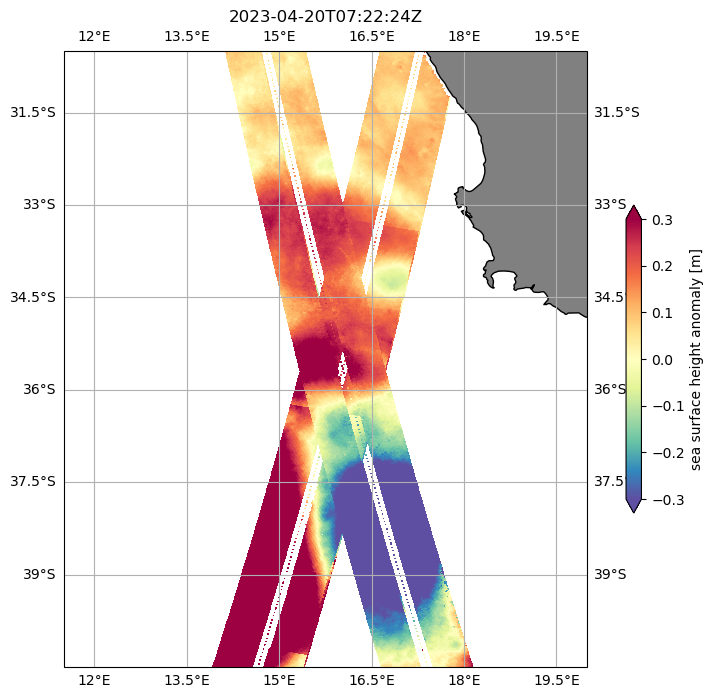

In [11]:
%%time
output_dir = "essai_plots2"  # Directory for saving plots
# Generate figures
dp.generate_plots(sorted_datasets, area, output_dir)
print(output_dir)

## **Make movie** 🎞️

In [38]:
%%time
image_folder = "essai_plots2"  # Folder containing the images
output_video = "SWOT_movie_3-2v2.mp4"  # Output video file name
fps = 2
# Frames per second

# Create the video
dp.make_movie_swot(image_folder, output_video, fps)

Video saved as 'SWOT_movie_3-2v2.mp4'
CPU times: user 1.72 s, sys: 50.1 ms, total: 1.77 s
Wall time: 1.77 s
